In [6]:
import pandas as pd
import numpy as np
import os, json
import matplotlib.pyplot as plt
import torch

In [11]:
def load_reward(path):
    files_name = os.listdir(path)
    files_name.remove('model_parameters.txt')
    models = list(filter(lambda n: "model" in n,  files_name))
    if len(models)==1:
        load_path = os.path.join(path, 'model.pt')
    else: 
        temp = np.array([int(name.replace('model_','').replace('.pt','')) for name in iter(models)])
        load_path = os.path.join(path, 'model_'+str(max(temp))+'.pt')
        
    ckpt = torch.load(load_path)
    
    return ckpt['avg_reward'], ckpt['std_reward'], ckpt['enc_losses']

def time_to_cv(r):
    temp = np.where(r>(-200))[0]
    if len(temp)==0:
        return len(r)
    else: 
        return temp[0]

In [8]:
param = []
r_mean = []
r_std = []
enc_loss = []
for d in filter(lambda x:'Pendulum' in x,os.listdir(os.getcwd())):
    if os.path.exists(os.path.join(d,"model_parameters.txt")):
        with open(os.path.join(d,'model_parameters.txt')) as f:
            param.append(json.loads(f.read()))
        r_mean_, r_std_, enc_loss_ = load_reward(d)
        param[-1]['r_mean'] = np.array(r_mean_)
        param[-1]['r_std'] = np.array(r_std_)
        param[-1]['enc_loss'] = np.array(enc_loss_)
        param[-1]['name'] = 
        
data = pd.DataFrame.from_dict(param)
data['name'] = [i.split('/')[-1] for i in data['save_dir']]

In [18]:
pd.set_option('display.max_columns', None)
data

,mode,env,seed,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,steps_per_epoch,epochs,max_ep_len,gamma,delta,save_period,train_continue,test_episodes,test_steps,epoch_load,v_hid,v_l,vf_lr,v_iters,pi_activation,pi_hid,pi_l,damping_coeff,cg_iters,backtrack_iters,backtrack_coeff,lam,pretrain_epochs,epochs_belief_training,pretrain_steps,train_enc_iters,size_pred_buf,batch_size_pred,enc_lr,maf_lr,enc_dim,enc_heads,enc_l,enc_ff,enc_rescaling,enc_causal,enc_pred_to_pi,only_last_belief,convolutions,lstm,n_layers,hidden_size,n_blocks_maf,hidden_dim,hidden_dim_maf,save_dir,r_mean,r_std,enc_loss,enc_training,name,max_mean_r,cv_speed,time_to_200
0,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,100.0,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200.0,10000,1,500000,10000,0.0100,0.010,8,2,2,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run12,"[-1211.012707351876, -1231.2909971300892, -123...","[240.86903297886775, 308.8280060161002, 297.34...","[4.732537269592285, 4.684809684753418, 4.65454...",NaN,Pendulum-run12,-610.769630,200,200
1,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,100.0,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,200.0,10000,1,500000,10000,0.0050,0.005,16,2,2,8,False,True,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run25,"[-1256.7542863653105, -1363.3899276715933, -12...","[312.8951367165946, 251.18627619685077, 312.04...","[4.608074188232422, 4.442437648773193, 4.54588...",NaN,Pendulum-run25,-175.793307,669,669
2,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,NaN,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,NaN,10000,1,100000,10000,0.0050,0.005,64,2,1,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run1,"[-1243.6660670668234, -1219.3872188804394, -12...","[323.52921866955217, 352.5992157919941, 313.41...","[4.6436591148376465, 4.635229110717773, 4.5877...",False,Pendulum-run1,-105.295376,286,286
3,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,100.0,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,NaN,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run13,"[-1192.2225263567843, -1146.1421175915305, -11...","[347.2627434480716, 296.11107929566936, 301.13...","[4.754909038543701, 4.698947906494141, 4.63938...",NaN,Pendulum-run13,-118.684532,281,281
4,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,100.0,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,NaN,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run14,"[-1250.0643200755642, -1292.5227931589166, -12...","[318.3603070762177, 299.2142076381061, 362.177...","[4.7136735916137695, 4.5440592765808105, 4.498...",NaN,Pendulum-run14,-165.011250,329,329
5,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,100.0,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,NaN,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run15,"[-1320.7655809424132, -1254.0409390757632, -12...","[285.3197976965187, 263.5354758264573, 307.202...","[4.466994285583496, 4.421662330627441, 4.39176...",NaN,Pendulum-run15,-368.100989,1000,1000
6,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,100.0,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,NaN,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run16,"[-1202.4378973354576, -1174.5289715049594, -12...","[329.3234573004086, 295.2402133001967, 327.771...","[4.825789451599121, 4.837165355682373, 4.79120...",NaN,Pendulum-run16,-506.273106,1000,1000
7,train,Pendulum,1,3,False,50,0.7,True,5000,

In [12]:
print('Different columns: \n')
for c in data.columns:
    a = data[c].values
    if not (a[0] == a).all():
        print('\t -  '+c+'\n')

Different columns: 

	 -  seed

	 -  delta

	 -  pretrain_epochs

	 -  size_pred_buf

	 -  batch_size_pred

	 -  enc_lr

	 -  maf_lr

	 -  enc_dim

	 -  enc_l

	 -  enc_training

	 -  hidden_dim

	 -  save_dir

	 -  save_period

	 -  epochs_belief_training



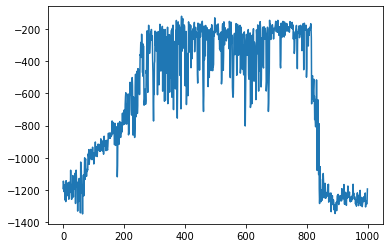

In [24]:
plt.plot(data['r_mean'][3])


In [14]:
for i, r in enumerate(data['r_mean']):
    m = np.argmax(r)
    print('{0:<40} - Max mean reward {1:<20} -  at epoch {2}'.format(data['name'][i],r[m],m))
    
data['max_mean_r'] = [max(r) for r in data['r_mean']]
data['time_to_200'] = [time_to_cv(r) for r in data['r_mean']]

Pendulum-run12                           - Max mean reward -610.769630021506    -  at epoch 197
Pendulum-run25                           - Max mean reward -175.7933065071076   -  at epoch 693
Pendulum-run1                            - Max mean reward -105.29537641674673  -  at epoch 719
Pendulum-run13                           - Max mean reward -118.68453189020231  -  at epoch 389
Pendulum-run14                           - Max mean reward -165.0112496372414   -  at epoch 396
Pendulum-run15                           - Max mean reward -368.10098898625654  -  at epoch 337
Pendulum-run16                           - Max mean reward -506.2731064410393   -  at epoch 997
Pendulum-run17                           - Max mean reward -159.54526223296367  -  at epoch 838
Pendulum-run18                           - Max mean reward -592.2061443735985   -  at epoch 419
Pendulum-run2                            - Max mean reward -138.52278679610833  -  at epoch 441
Pendulum-run20                          

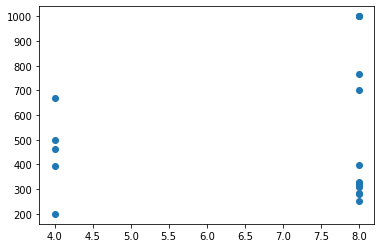

In [17]:
plt.scatter(data['hidden_dim'], data['time_to_200'])

,mode,env,seed,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,steps_per_epoch,epochs,max_ep_len,gamma,delta,train_continue,test_episodes,test_steps,epoch_load,v_hid,v_l,vf_lr,v_iters,pi_activation,pi_hid,pi_l,damping_coeff,cg_iters,backtrack_iters,backtrack_coeff,lam,pretrain_epochs,pretrain_steps,train_enc_iters,size_pred_buf,batch_size_pred,enc_lr,maf_lr,enc_dim,enc_heads,enc_l,enc_ff,enc_rescaling,enc_causal,enc_training,enc_pred_to_pi,only_last_belief,convolutions,lstm,n_layers,hidden_size,n_blocks_maf,hidden_dim,hidden_dim_maf,save_dir,save_period,epochs_belief_training,name
0,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10000,1,100000,10000,0.0050,0.005,64,2,1,8,False,True,False,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run1,NaN,NaN,Pendulum-run1
1,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run13,100.0,NaN,Pendulum-run13
2,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run14,100.0,NaN,Pendulum-run14
3,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,64,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run15,100.0,NaN,Pendulum-run15
4,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run16,100.0,NaN,Pendulum-run16
5,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run17,100.0,NaN,Pendulum-run17
6,train,Pendulum,2,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run18,100.0,NaN,Pendulum-run18
7,train,Pendulum,0,3,False,50,0.7,True,5000,1000,250,0.99,0.001,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,2,10000,1,100000,1000,0.0500,0.005,32,2,1,8,False,True,False,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run2,NaN,NaN,Pendulum-run2
8,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0100,0.010,8,2,2,8,False,True,NaN,False,False,False,False,3,16,5,8,16,./output/dtrpo/Pendulum-Results/Pendulum-run24,100.0,200.0,Pendulum-run24
9,train,Pendulum,1,3,False,50,0.7,True,5000,1000,250,0.99,0.005,False,10,250,None,64,1,0.01,3,nn.ReLU,64,2,0.1,10,10,0.8,0.97,25,10000,1,500000,10000,0.0050,0.005,16,2,2,8,False,True,NaN,False,False,False,False,3,16,5,4,16,./output/dtrpo/Pendulum-Results/Pendulum-run25,100.0,200.0,Pendulum-run25
